In [16]:
!unzip Daily-Climate-time-series-data.zip

Archive:  Daily-Climate-time-series-data.zip
replace DailyDelhiClimateTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DailyDelhiClimateTest.csv  
replace DailyDelhiClimateTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DailyDelhiClimateTrain.csv  


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [18]:
df= pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [19]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [21]:
fig = px.line(df,
              x="date",
              y="meantemp",
              title="Mean Temperature in Delhi Over the Years")
fig.show()

In [22]:
fig = px.line(df,
              x="date",
              y="humidity",
              title="Humidity in Delhi Overthe Years")
fig.show()

In [23]:
fig = px.line(df,
              x="date",
              y="wind_speed",
              title="Wind Speed in Delhi Over the Years")
fig.show()

In [24]:
fig = px.scatter(data_frame= df,
                 x  = "humidity",
                 y="meantemp",
                 size="meantemp",
                 trendline="ols",
                 title="Relationship Between Temperature and Humidity")
fig.show()

In [25]:
df["date"] = pd.to_datetime(df["date"],
                            format = '%Y-%m-%d')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


<function matplotlib.pyplot.show(close=None, block=None)>

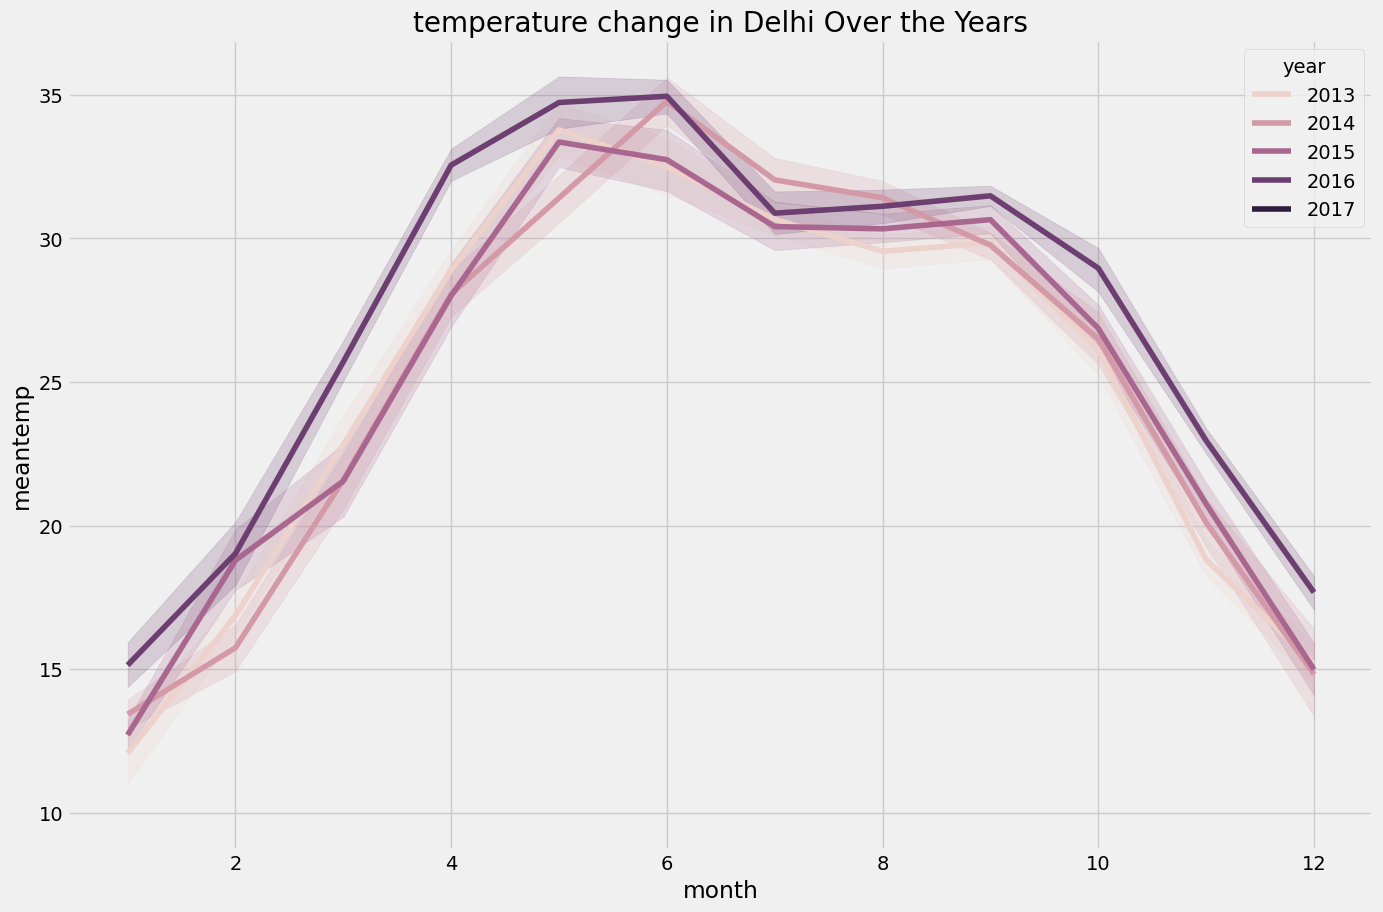

In [29]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 10))
plt.title("temperature change in Delhi Over the Years")
sns.lineplot(data = df,
             x = 'month',
             y = "meantemp",
             hue = "year")
plt.show

In [31]:
forecast_data = df.rename(columns ={"date":"ds",
                                    "meantemp":"y"})
forecast_data

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [33]:
model = Prophet()
model.fit(forecast_data)
forecast = model.make_future_dataframe(periods=365)
predictions  = model.predict(forecast)
plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdn_kg12z/p0u18svb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdn_kg12z/7l6a8fe7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25647', 'data', 'file=/tmp/tmpdn_kg12z/p0u18svb.json', 'init=/tmp/tmpdn_kg12z/7l6a8fe7.json', 'output', 'file=/tmp/tmpdn_kg12z/prophet_modelk3qkl245/prophet_model-20231019153514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
